## Key concepts
Gradient descent update
numerical derivative (central difference)

In [17]:
import numpy as np

In [18]:
# Define a funciton to minimize

def f(x):
    return (x-3) ** 2 + np.sin(x)

In [27]:
def numerical_derivative(func, x, h=1e-5):
    return (func(x + h) - func(x - h)) / (2 * h)

## Implement gradient descent algorithm
1) Starts from an initial guess (e.g., 𝑥 = 0)
2) Uses a learning rate 𝛼(e.g.,0.1)
3) Updates x iteratively until the change is below a tolerance or a maximum iteration limit is reached.


In [28]:
def gradient_descent(func, initial_x, alpha=0.1, tol=1e-6, max_iter=1000):
    x = initial_x
    iter_count = 0
    while iter_count < max_iter:
        grad = numerical_derivative(func, x)
        x_new = x - alpha * grad
        if abs(x_new - x) < tol:
            break
        x = x_new
        iter_count += 1
    return x, iter_count


In [29]:
optimal_x, iterations = gradient_descent(f, initial_x=0)
print("Optimal x:", optimal_x)
print("Minimum f(x):", f(optimal_x))
print("Iterations:", iterations)

Optimal x: 3.4728179886786035
Minimum f(x): -0.10164515329919294
Iterations: 56


Optimal x: 3.4728179886786035
Minimum f(x): -0.10164515329919294
Iterations: 56


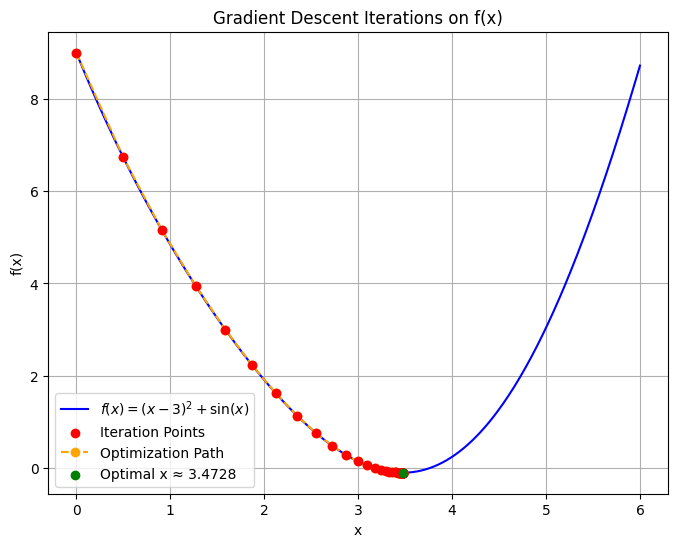

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function to minimize
def f(x):
    return (x - 3)**2 + np.sin(x)

# Numerical derivative using central difference method
def numerical_derivative(func, x, h=1e-5):
    return (func(x + h) - func(x - h)) / (2 * h)

# Gradient descent implementation with iteration history
def gradient_descent(func, initial_x, alpha=0.1, tol=1e-6, max_iter=1000):
    x = initial_x
    iter_count = 0
    # Lists to store the iteration history
    history_x = [x]
    history_y = [func(x)]
    
    while iter_count < max_iter:
        grad = numerical_derivative(func, x)
        x_new = x - alpha * grad
        # Check for convergence based on the change in x
        if abs(x_new - x) < tol:
            break
        x = x_new
        iter_count += 1
        history_x.append(x)
        history_y.append(func(x))
    
    return x, iter_count, history_x, history_y

# Run gradient descent starting from x0 = 0
optimal_x, iterations, history_x, history_y = gradient_descent(f, initial_x=0)
optimal_y = f(optimal_x)

print("Optimal x:", optimal_x)
print("Minimum f(x):", optimal_y)
print("Iterations:", iterations)

# Visualization using matplotlib
# Create a range of x values for plotting the function curve
x_vals = np.linspace(0, 6, 400)
y_vals = f(x_vals)

plt.figure(figsize=(8, 6))
# Plot the function curve
plt.plot(x_vals, y_vals, label=r"$f(x) = (x-3)^2 + \sin(x)$", color='blue')
# Plot the iteration points
plt.scatter(history_x, history_y, color='red', zorder=5, label="Iteration Points")
# Connect the iteration points to show the optimization path
plt.plot(history_x, history_y, color='orange', linestyle='--', marker='o', label="Optimization Path")
# Highlight the optimal point
plt.scatter([optimal_x], [optimal_y], color='green', zorder=6, label=f"Optimal x ≈ {optimal_x:.4f}")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gradient Descent Iterations on f(x)")
plt.legend()
plt.grid(True)
plt.show()
